# Predicting Term Deposit Subscription by a client

### Problem Statement: 
### Predict if a customer subscribes to a term deposits or not, when contacted by a marketing agent, by understanding the different features and performing predictive analytics

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,classification_report,f1_score,plot_confusion_matrix,roc_auc_score,roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
import math
warnings.filterwarnings('ignore')


In [2]:
# Set the default color for xticks and yticks
mpl.rcParams['xtick.color'] = 'cyan'
mpl.rcParams['ytick.color'] = 'cyan'
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

### Loading the dataset

In [3]:
df = pd.read_csv(r'C:\MLCourse\Learning\Guvi_Final_Projects\bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [103]:
df.shape

(41188, 21)

In [5]:
df.isnull().sum().sum()

0

#### No Null Values in the dataset

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### The mean value of features is on different scale for most of the features.Hence, Scaling is required 

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

#### The target has 36458-No and only 4640-Yes. Hence, the dataset is imbalanced

### Exploratory Data Analysis 

<Figure size 432x288 with 0 Axes>

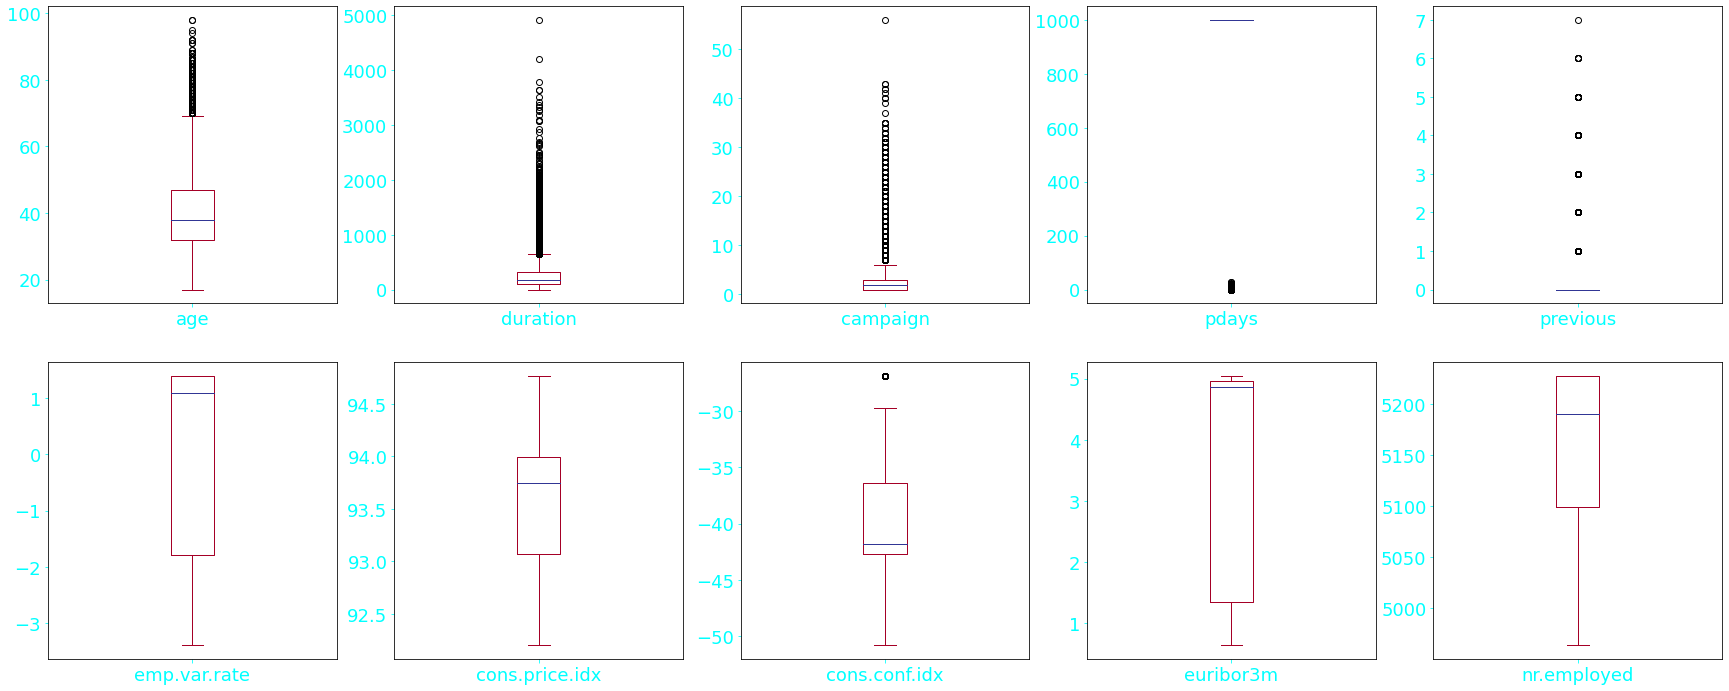

In [9]:
fig = plt.figure()
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(30,12),colormap='RdYlBu')
plt.show()

#### As there are outliers need to perform standard scaling 

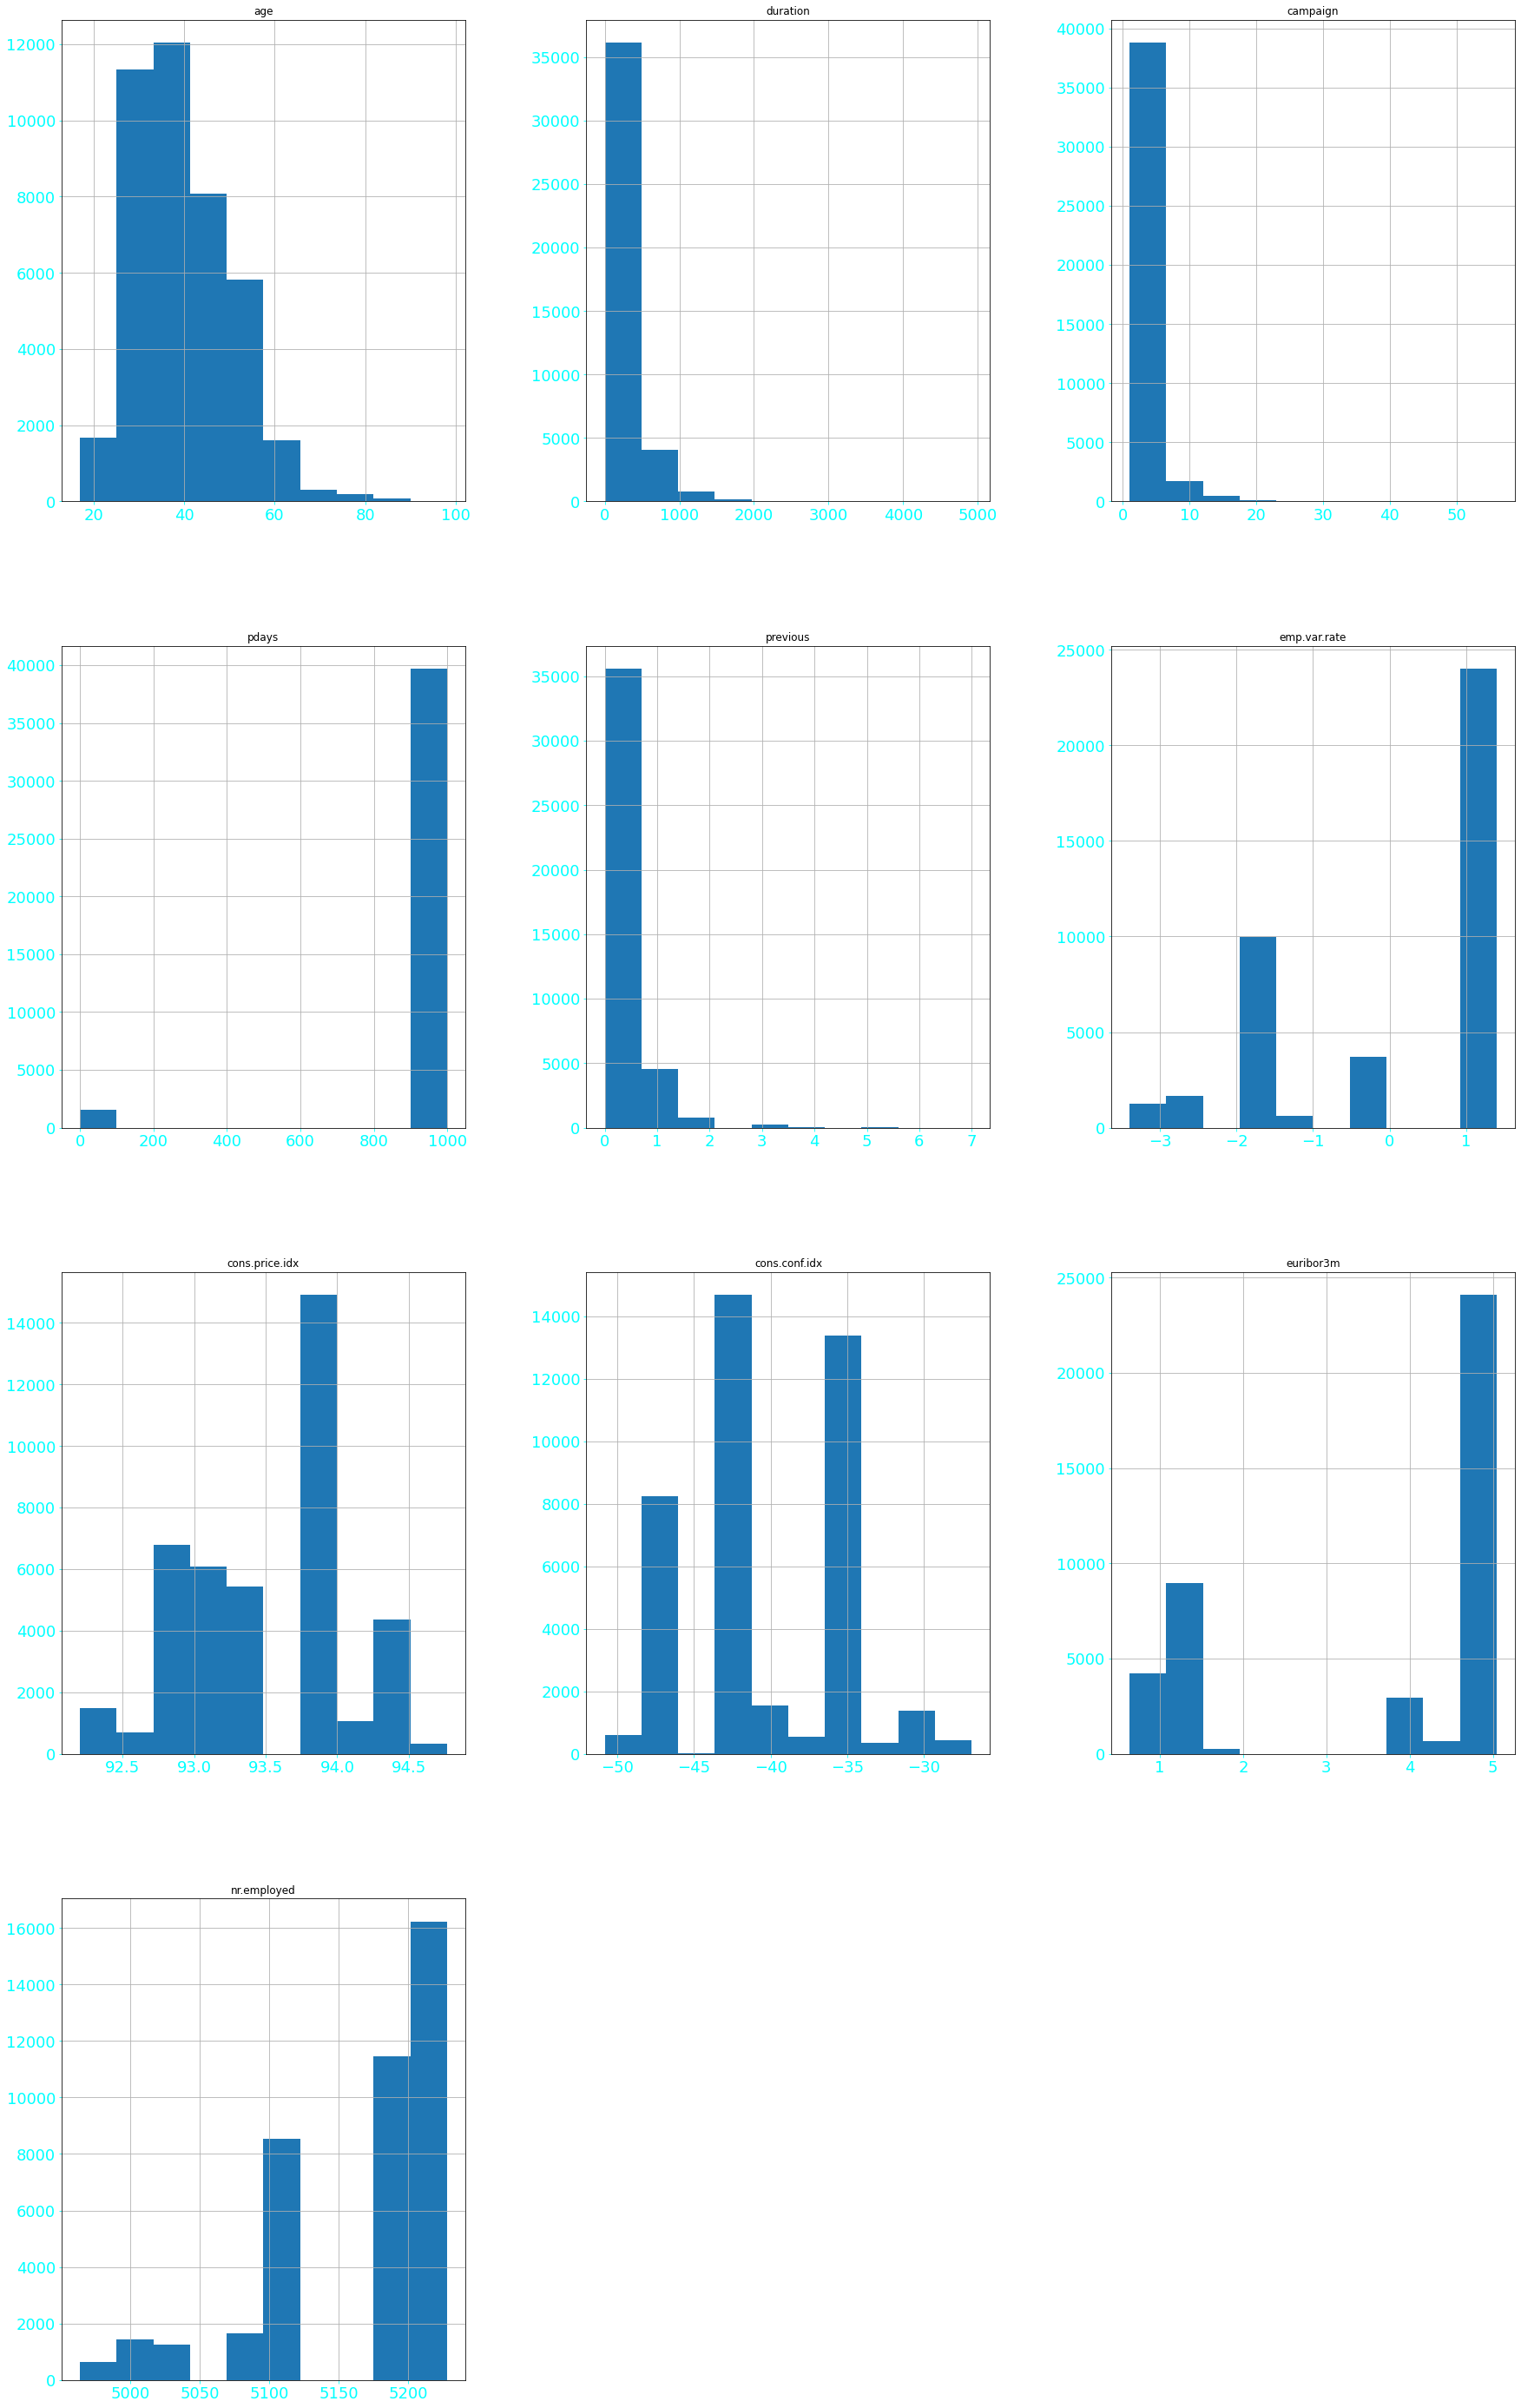

In [10]:
df.hist(figsize=(30,50))
plt.title('Histogram', color='red')
plt.show()

#### As seen in the above plots, only few features are normally distributed, while the rest are skewed 

#### Let us explore the relationship between the important features as a pair to explore thier impact on target 

#### Converting object type features to interger type

In [11]:
df_2 = df.copy()
df_2['job'] = df_2['job'].map({'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6, 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11, 'unknown':12})
df_2['marital'] = df_2['marital'].map({'divorced':1, 'married':2, 'single':3, 'unknown':4})
df_2['education'] = df_2['education'].map({'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6, 'university.degree':7, 'unknown':8})
df_2['default'] = df_2['default'].map({'no':1, 'unknown':2, 'yes':3})
df_2['housing'] = df_2['housing'].map({'no':1, 'unknown':2, 'yes':3})
df_2['loan'] = df_2['loan'].map({'no':1, 'unknown':2, 'yes':3})
df_2['contact'] = df_2['contact'].map({'cellular':1, 'telephone':2})
df_2['month'] = df_2['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12,
                                   'mar':3, 'apr':4,'sep':9})
df_2['day_of_week'] = df_2['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})
df_2['poutcome'] = df_2['poutcome'].map({'failure':1, 'nonexistent':2, 'success':3})
df_2['y'] = df_2['y'].map({'no':0,'yes':1})

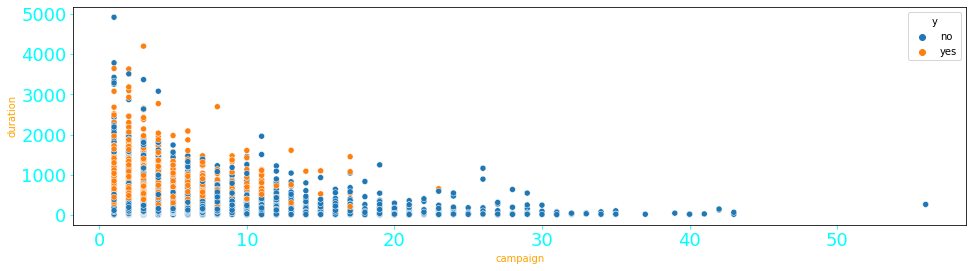

In [12]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot('campaign','duration',hue='y',data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
plt.show()

#### The optimum number of contacts per campaign is less than 5 and duration of the call less than 3000 secs for getting the Term deposit, beyond these numbers customers going for term deposit decreases rapidly

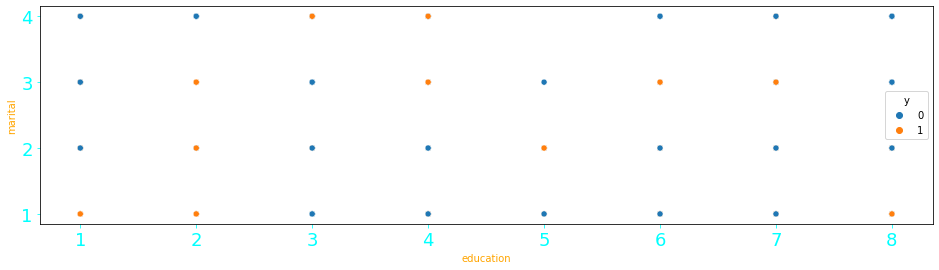

In [13]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot('education','marital',hue='y',data = df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
plt.show()

#### Those who are single and have education qualification of :  'basic.6y',  'high.school', 'professional.course', 'university.degree' are more likely to go for tem deposit

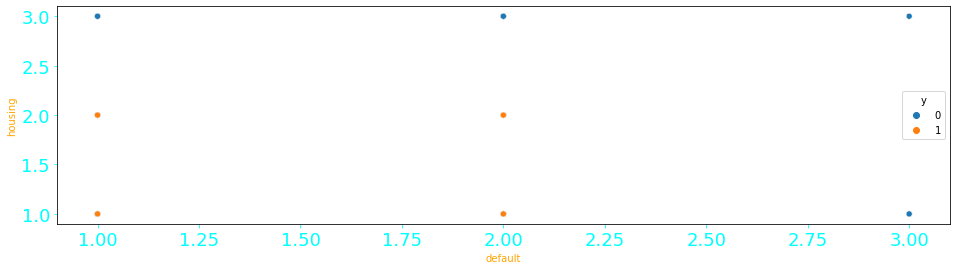

In [14]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot('default','housing',hue='y',data = df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
plt.show()

#### The customers whose default status is no and unknown are more likely to go for term-deposit 

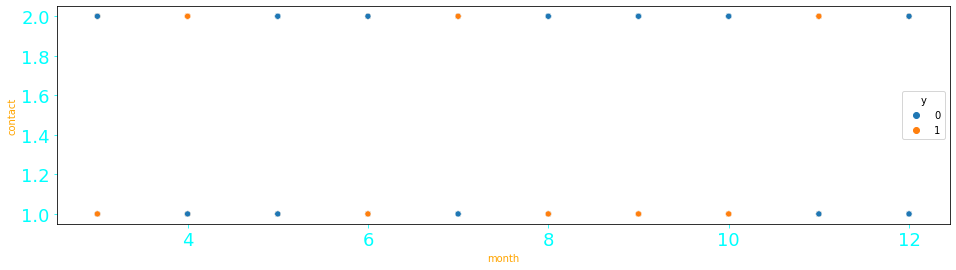

In [15]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot('month','contact',hue='y',data = df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
plt.show()

#### The customers contacted on the months of March, June,August,September,October through cellular phone are more likely to go for Term deposit

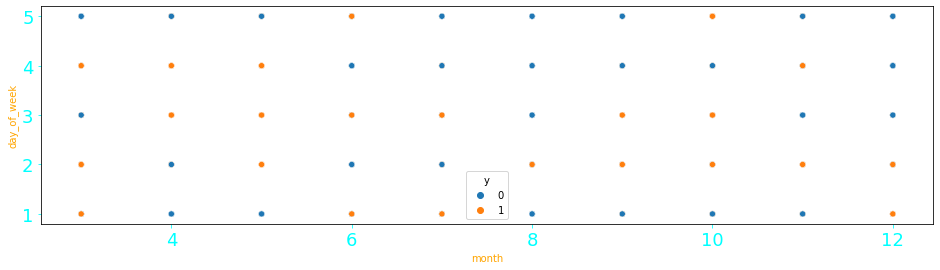

In [16]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot('month','day_of_week',hue='y',data = df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
plt.show()

#### Most fruitful days for communication are Tuesday and Wednesday, regardless of the month communicated 

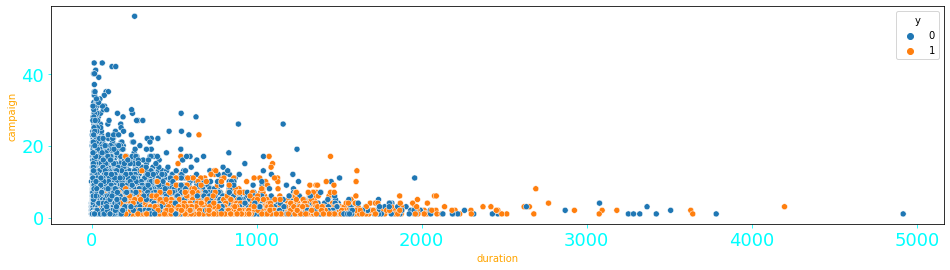

In [17]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot('duration','campaign',hue='y',data = df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
plt.show()

#### Successful campaigns are those where the nymber of contacts are less than  15 and duration of the call is 200-1400

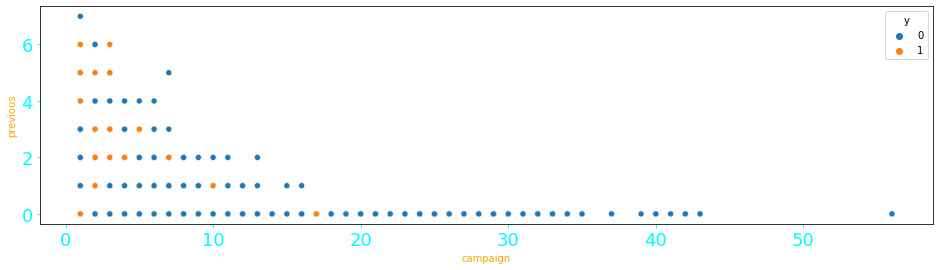

In [18]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot('campaign','previous',hue='y',data = df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
plt.show()

#### Customers went for term deposit when the number of contacts made during the campaign were less than 5 and when they were contacted more than twice prior to the campaign 

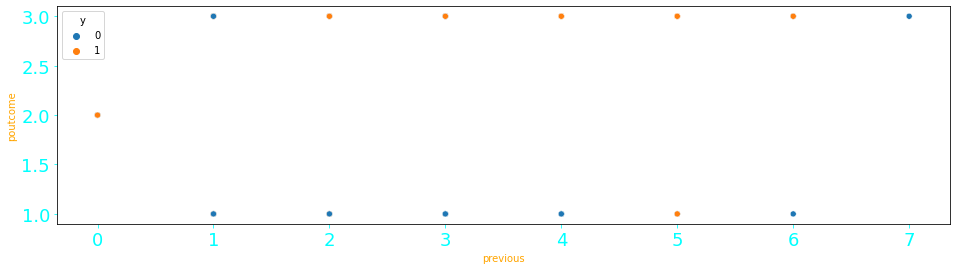

In [19]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot('previous','poutcome',hue='y',data = df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
plt.show()

#### Previous marketing campaign succedded when the customers were contacted 2 to 6 times 

### Let us explore the impact of each feature on the target

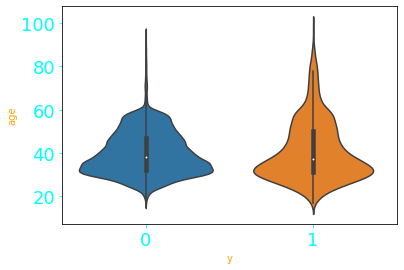

In [20]:
ax = sns.violinplot('y','age',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')


#### Most people are in thier higher 30s and those aged 60 and above are more likely to subscribe to term deposit

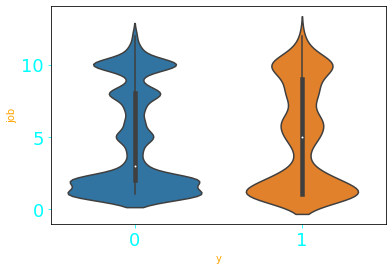

In [21]:
ax = sns.violinplot('y','job',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')


#### Most people are either admins or in blue collar job and those who are retired or self empolyed are more likely to invest in term deposit

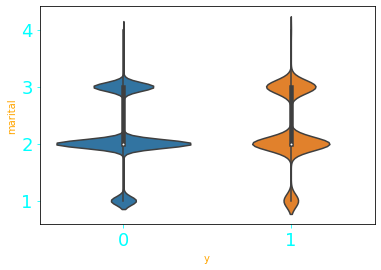

In [22]:
ax = sns.violinplot('y','marital',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### Married individuals are more inclined towards not investing in term deposit

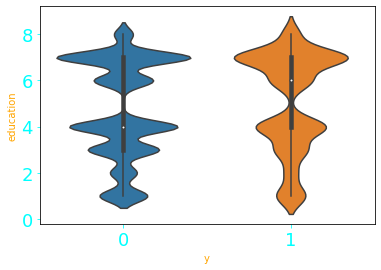

In [23]:
ax = sns.violinplot('y','education',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### Education of an individual doesnt seem have any infulence on term deposit 

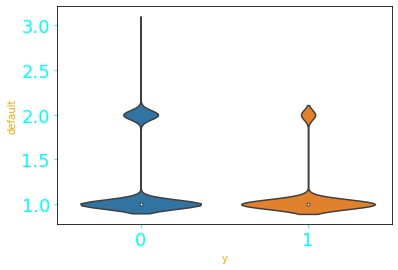

In [25]:
ax = sns.violinplot('y','default',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### Being a defaulter doesnt affect buying of term deposit

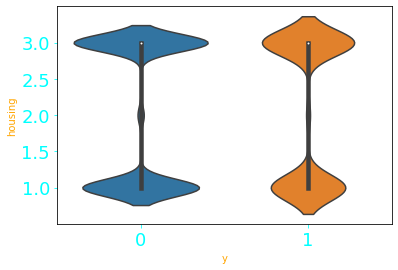

In [26]:
ax = sns.violinplot('y','housing',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### People with housing loan exhibit less interest in term deposit 

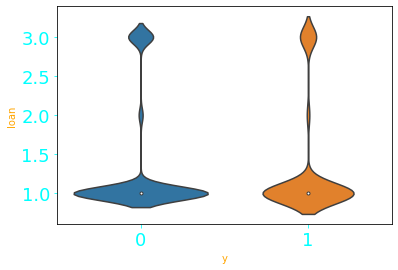

In [27]:
ax = sns.violinplot('y','loan',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### People with personal loan exhibit less interest in term deposit 

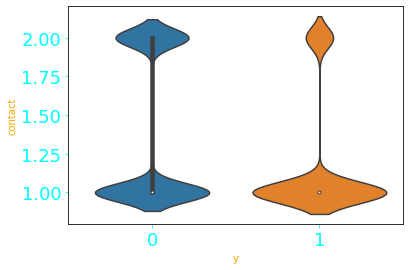

In [28]:
ax = sns.violinplot('y','contact',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### Those who recieved a call on thier cellular phone are more likely to go for Term deposit

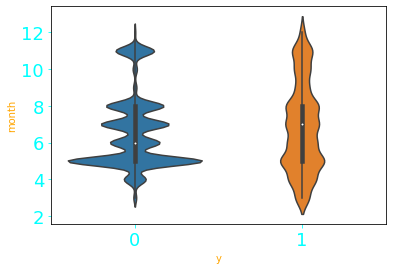

In [29]:
ax = sns.violinplot('y','month',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### In May most people didnt go for term deposit, while during Jan, Feb, Mar, Sep and Oct they did

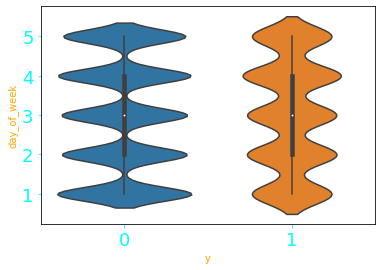

In [30]:
ax = sns.violinplot('y','day_of_week',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### Among those who bought term deposit, Calls made on Monday and Friday were not much fruitful 

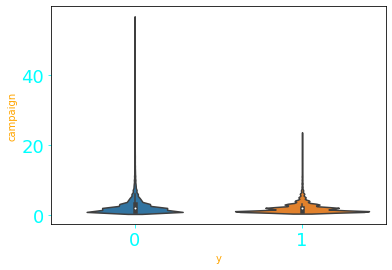

In [31]:
ax = sns.violinplot('y','campaign',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

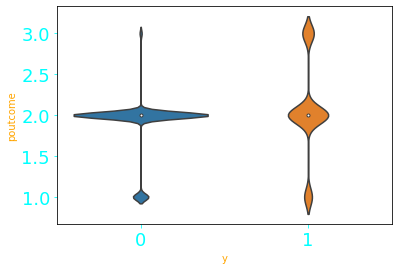

In [32]:
ax = sns.violinplot('y','poutcome',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

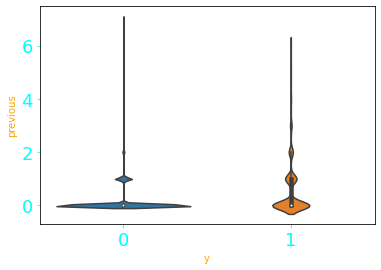

In [33]:
ax = sns.violinplot('y','previous',data=df_2)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

### Let us explore the relationship among the features using df.corr() function

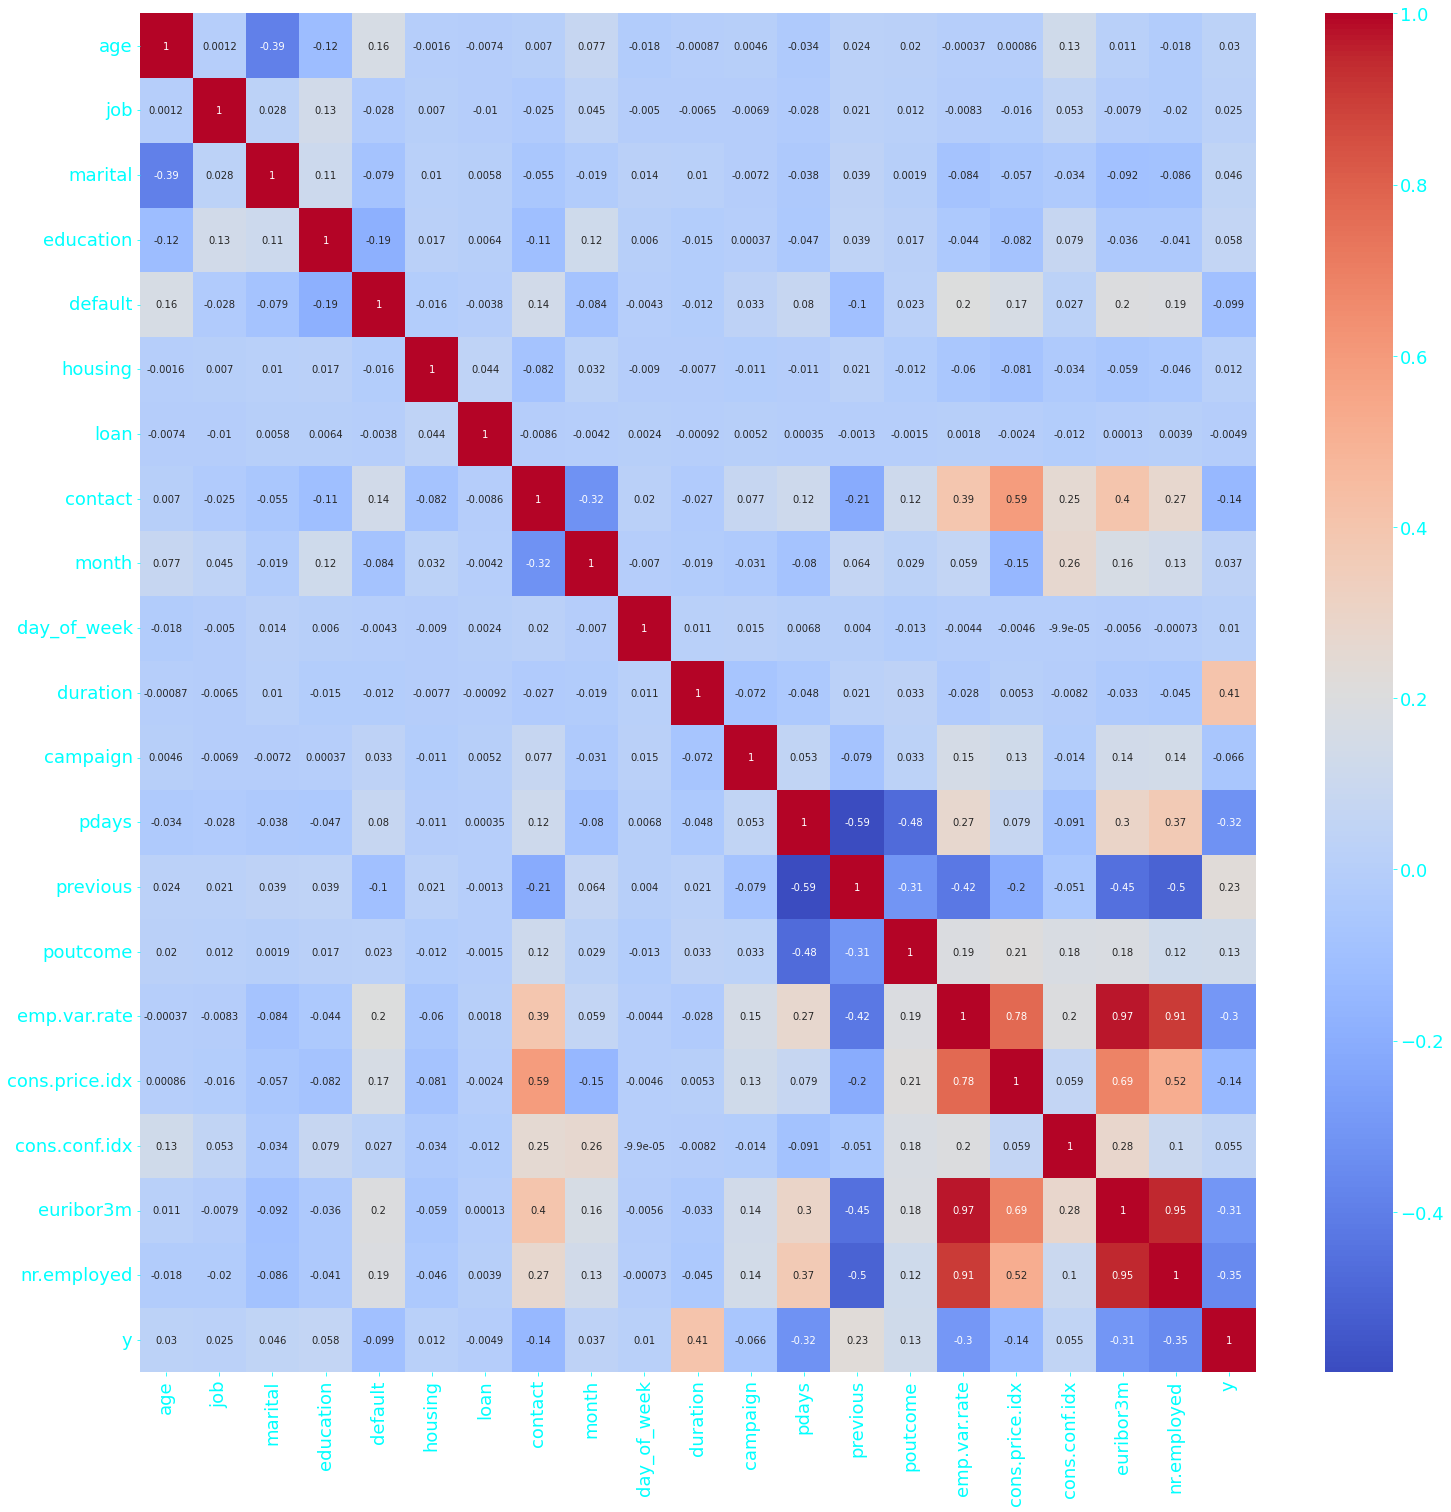

In [104]:
corr_matrix = df_2.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('heatmap.jpg',dpi=200)
plt.show()

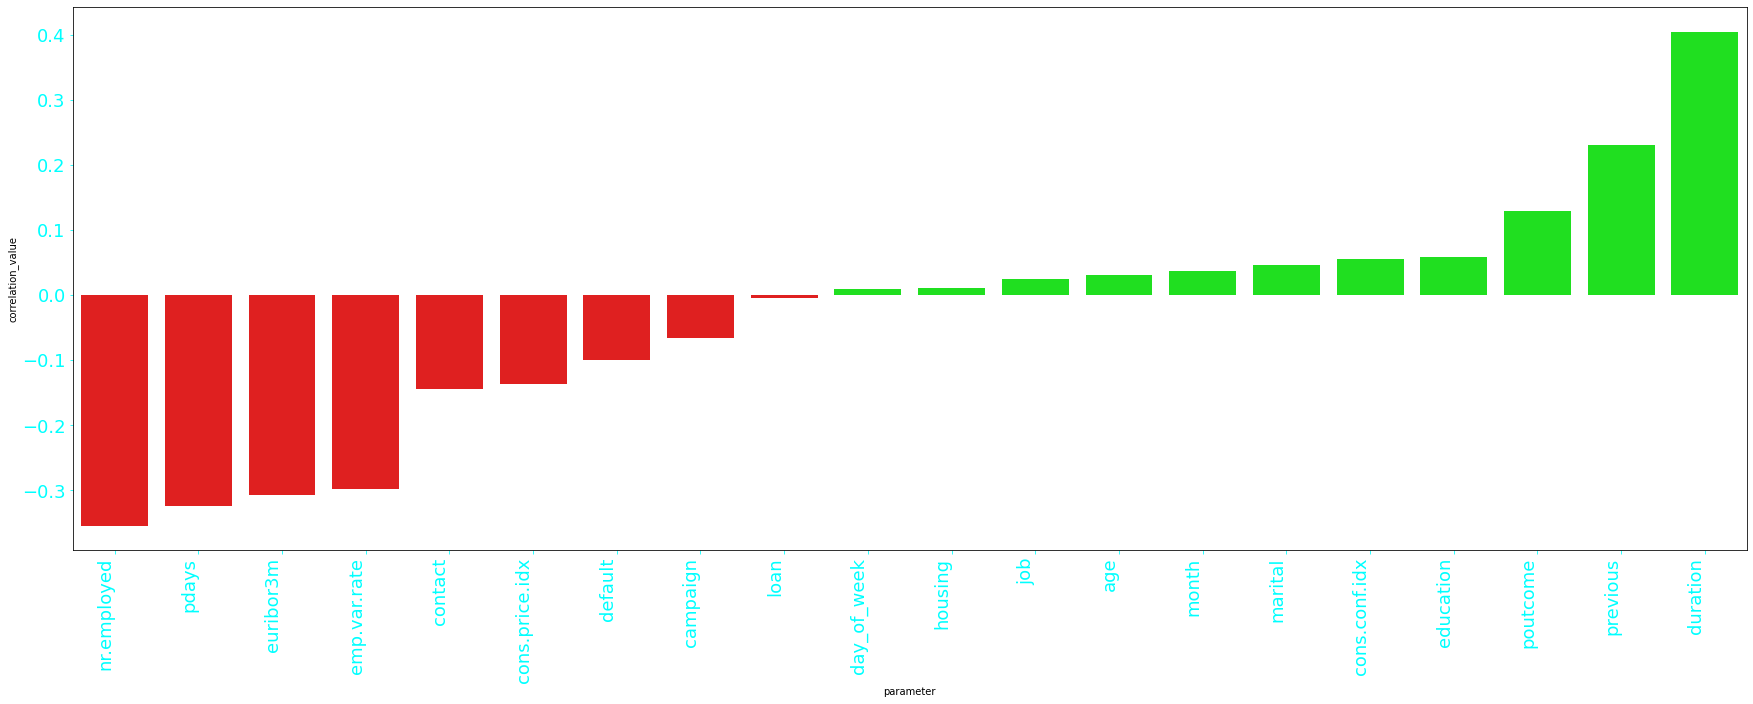

In [35]:
#Showing the correaltion between target and individual features
plt.figure(figsize=(30,10))
df_corr = df_2.corr()
res = df_corr['y'][:-1]
res1 = res.reset_index()
res1.rename(columns={'index':'parameter','y':'correlation_value'}, inplace = True)
res2 = res1.sort_values(by = 'correlation_value',ascending = True)
colors = ['red' if val < 0 else 'lime' for val in res2['correlation_value']]
ax = sns.barplot(data=res2, x='parameter', y='correlation_value', palette=colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

#### As seen above few features have negative correlation while others are positively correalted with the target. However, none of them show strong correlation 

In [36]:
#Displaying the features which have negative correlation with the target
neg_corr = res2[res2['correlation_value'] < 0]
neg_corr.sort_values(by='correlation_value', ascending = True, inplace=True)
print('Features having negative correlation with the target')
print('')
print(neg_corr.reset_index(drop=True))

Features having negative correlation with the target

        parameter  correlation_value
0     nr.employed          -0.354678
1           pdays          -0.324914
2       euribor3m          -0.307771
3    emp.var.rate          -0.298334
4         contact          -0.144773
5  cons.price.idx          -0.136211
6         default          -0.099352
7        campaign          -0.066357
8            loan          -0.004909


In [37]:
#Displaying the features which have positive correlation with the target
pos_corr = res2[res2['correlation_value'] > 0]
pos_corr.sort_values(by='correlation_value', ascending = True, inplace=True)
print('Features having positive correlation with the target')
print('')
print(pos_corr.reset_index(drop=True))

Features having positive correlation with the target

        parameter  correlation_value
0     day_of_week           0.010051
1         housing           0.011552
2             job           0.025122
3             age           0.030399
4           month           0.037187
5         marital           0.046203
6   cons.conf.idx           0.054878
7       education           0.057799
8        poutcome           0.129789
9        previous           0.230181
10       duration           0.405274


### Before proceeding with feature scaling and hyper parameter tuning , let us get the f1 score of the dataset to set a benchmark first

In [38]:
all_metrics= []

In [39]:
y = df_2['y']
X = df_2.drop('y', axis=1)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2, random_state=42)
model_1 = SVC()
model_1.fit(x_train_1,y_train_1)
y_pred_1 = model_1.predict(x_test_1)
print('Classification report of original dataset with test size of 20%')
print(classification_report(y_test_1,y_pred_1))

Classification report of original dataset with test size of 20%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.60      0.21      0.31       935

    accuracy                           0.89      8238
   macro avg       0.75      0.59      0.63      8238
weighted avg       0.87      0.89      0.87      8238



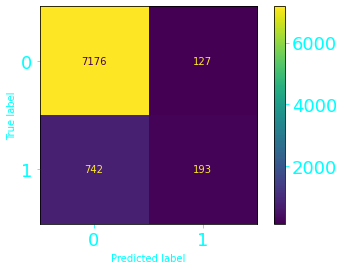

In [40]:
cm = confusion_matrix(y_test_1,y_pred_1, labels=model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_1.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [41]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_1,y_pred_1,labels=model_1.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Original dataset with 80:20 split')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 7176, False Positive = 127, False Negative = 742,True Positive = 193
Accuracy is 0.89
Precision is 0.6
Sensitivity is 0.21
Specificity is 0.98
F1 Score is 0.31


In [42]:
y = df_2['y']
X = df_2.drop('y', axis=1)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size=0.25, random_state=42)
model_2 = SVC()
model_2.fit(x_train_2,y_train_2)
y_pred_2 = model_2.predict(x_test_2)
print('Classification report of original dataset with test size of 25%')
print(classification_report(y_test_2,y_pred_2))

Classification report of original dataset with test size of 25%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9144
           1       0.61      0.21      0.32      1153

    accuracy                           0.90     10297
   macro avg       0.76      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



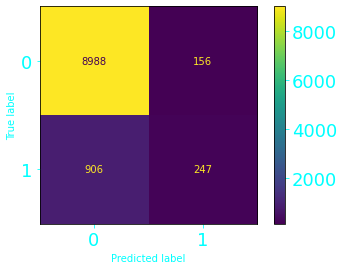

In [43]:
cm = confusion_matrix(y_test_2,y_pred_2, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_2.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [44]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_2,y_pred_2,labels=model_2.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Original dataset with 75:25 split')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 8988, False Positive = 156, False Negative = 906,True Positive = 247
Accuracy is 0.9
Precision is 0.61
Sensitivity is 0.21
Specificity is 0.98
F1 Score is 0.31


In [45]:
y = df_2['y']
X = df_2.drop('y', axis=1)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X,y,test_size=0.30, random_state=43)
model_3 = SVC()
model_3.fit(x_train_3,y_train_3)
y_pred_3 = model_3.predict(x_test_3)
print('Classification report of original dataset with test size of 30%')
print(classification_report(y_test_3,y_pred_3))


Classification report of original dataset with test size of 30%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10952
           1       0.64      0.22      0.33      1405

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.64     12357
weighted avg       0.88      0.90      0.87     12357



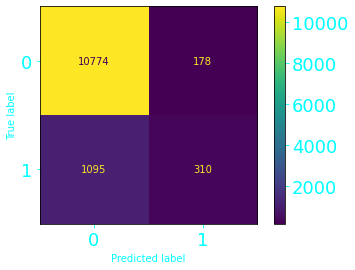

In [46]:
cm = confusion_matrix(y_test_3,y_pred_3, labels=model_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_3.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [47]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_3,y_pred_3,labels=model_3.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Original dataset with 70:30 split')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 10774, False Positive = 178, False Negative = 1095,True Positive = 310
Accuracy is 0.9
Precision is 0.64
Sensitivity is 0.22
Specificity is 0.98
F1 Score is 0.33


#### Low recall and f1 scores indicate imbalanced data 

#### Let us try undersampling to tackle the issue 

In [48]:
df_2.groupby('y').size()

y
0    36548
1     4640
dtype: int64

In [49]:
df_2_yes = df_2[df_2['y'] == 1]
df_2_no = df_2[df_2['y'] == 0]

In [50]:
df_2_yes.shape, df_2_no.shape

((4640, 21), (36548, 21))

In [51]:
df_temp = df_2_no.sample(4640)
df_temp.shape

(4640, 21)

In [52]:
df_under_sampled = pd.concat([df_2_yes,df_temp],axis=0)
df_under_sampled.shape

(9280, 21)

In [53]:
df_under_sampled.groupby('y').size()

y
0    4640
1    4640
dtype: int64

In [54]:
def disp_f1_score_sampling(X,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)
    model = SVC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))

In [56]:
y_u = df_under_sampled['y']
X_u = df_under_sampled.drop('y', axis=1)
x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(X_u,y_u,test_size=0.20, random_state=43)
model_u = SVC()
model_u.fit(x_train_u,y_train_u)
y_pred_u = model_u.predict(x_test_u)
print('Classification report of Under-sampled dataset')
print(classification_report(y_test_u,y_pred_u))

Classification report of Under-sampled dataset
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       940
           1       0.84      0.78      0.81       916

    accuracy                           0.82      1856
   macro avg       0.82      0.82      0.82      1856
weighted avg       0.82      0.82      0.82      1856



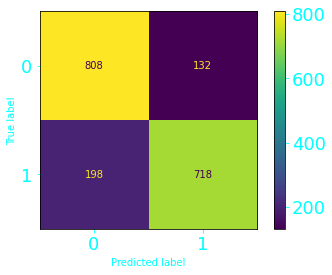

In [57]:
cm = confusion_matrix(y_test_u,y_pred_u, labels=model_u.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_u.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [58]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_u,y_pred_u,labels=model_u.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Under-sampled dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 808, False Positive = 132, False Negative = 198,True Positive = 718
Accuracy is 0.82
Precision is 0.84
Sensitivity is 0.78
Specificity is 0.86
F1 Score is 0.81


#### Immediately we can notice a huge difference in the values of recall and f1 score compared to original dataset 

#### Now lets us try our hands on over sampling 

In [59]:
df_2.groupby('y').size()

y
0    36548
1     4640
dtype: int64

In [60]:
df_2_yes = df_2[df_2['y'] == 1]
df_2_no = df_2[df_2['y'] == 0]

In [61]:
df_2_yes.shape, df_2_no.shape

((4640, 21), (36548, 21))

In [62]:
df_temp_2 = df_2_yes.sample(36548,replace=True)
df_temp_2.shape

(36548, 21)

In [63]:
df_over_sampled = pd.concat([df_2_no,df_temp_2],axis=0)
df_over_sampled.shape

(73096, 21)

In [65]:
y_o = df_over_sampled['y']
X_o = df_over_sampled.drop('y', axis=1)
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(X_o,y_o,test_size=0.20, random_state=43)
model_o = SVC()
model_o.fit(x_train_o,y_train_o)
y_pred_o = model_o.predict(x_test_o)
print('Classification report of Over-sampled dataset')
print(classification_report(y_test_o,y_pred_o))

Classification report of Over-sampled dataset
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      7472
           1       0.82      0.86      0.84      7148

    accuracy                           0.84     14620
   macro avg       0.84      0.84      0.84     14620
weighted avg       0.84      0.84      0.84     14620



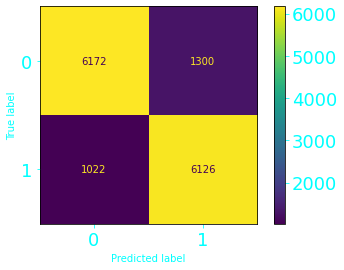

In [66]:
cm = confusion_matrix(y_test_o,y_pred_o, labels=model_o.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_o.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [67]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_o,y_pred_o,labels=model_o.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Over-sampled dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6172, False Positive = 1300, False Negative = 1022,True Positive = 6126
Accuracy is 0.84
Precision is 0.82
Sensitivity is 0.86
Specificity is 0.83
F1 Score is 0.84


#### Similar numbers for over sampling 

#### Now with SMOTE - Synthetic Minority Over Sampling Technique 

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [69]:
# Defining rhe features and target for SMOTE dataset
print('\t \tClassification report for the SMOTE dataset')
print('')
disp_f1_score_sampling(X_sm,y_sm)

	 	Classification report for the SMOTE dataset

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      9137
           1       0.84      0.86      0.85      9137

    accuracy                           0.85     18274
   macro avg       0.85      0.85      0.85     18274
weighted avg       0.85      0.85      0.85     18274



In [70]:
X_sm.shape, y_sm.shape

((73096, 20), (73096,))

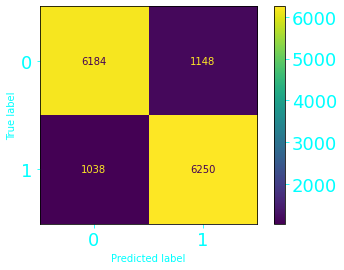

In [71]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)
model_sm = SVC()
model_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = model_sm.predict(X_test_sm)
cm = confusion_matrix(y_test_sm,y_pred_sm, labels=model_sm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_sm.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

#### As expected SMOTE does the better job and hence choosing to go with it  

In [72]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_sm,y_pred_sm,labels=model_sm.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Original dataset after SMOTE')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6184, False Positive = 1148, False Negative = 1038,True Positive = 6250
Accuracy is 0.85
Precision is 0.84
Sensitivity is 0.86
Specificity is 0.84
F1 Score is 0.85


In [73]:
ss = StandardScaler()
X_ss = ss.fit_transform(X_sm)
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss,y_sm,test_size=0.2, random_state=42)
model_ss = SVC()
model_ss.fit(X_train_ss,y_train_ss)
y_pred_ss = model_ss.predict(X_test_ss)
print('Classification report of SMOTE-scaled dataset')
print(classification_report(y_test_ss,y_pred_ss))

Classification report of SMOTE-scaled dataset
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7332
           1       0.91      0.94      0.92      7288

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



#### Scaling alone is pushing up the accuracy by 7% 

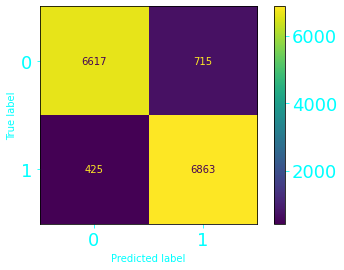

In [74]:
cm = confusion_matrix(y_test_ss,y_pred_ss, labels=model_ss.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ss.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [75]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_ss,y_pred_ss, labels=model_ss.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('SMOTE-Scaled dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6617, False Positive = 715, False Negative = 425,True Positive = 6863
Accuracy is 0.92
Precision is 0.91
Sensitivity is 0.94
Specificity is 0.9
F1 Score is 0.92


#### After performing the Gridsearch found out the values for hyper parameters, putting it the values for each algorithm 

In [76]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_ss,y_sm,test_size=0.2, random_state=42)
model_lr = LogisticRegression(penalty = 'l2',C=0.5, max_iter=20)
model_lr.fit(X_train_lr,y_train_lr)
y_pred_lr = model_lr.predict(X_test_lr)
print('Classification report of SMOTE scaled dataset - Logistic Regression')
print(classification_report(y_test_lr,y_pred_lr))

Classification report of SMOTE scaled dataset - Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7332
           1       0.88      0.89      0.88      7288

    accuracy                           0.88     14620
   macro avg       0.88      0.88      0.88     14620
weighted avg       0.88      0.88      0.88     14620



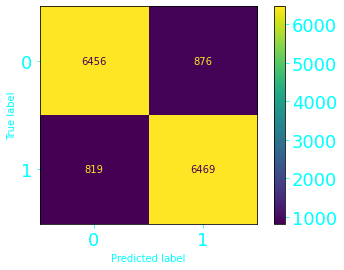

In [77]:
cm = confusion_matrix(y_test_lr,y_pred_lr, labels=model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [78]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_lr,y_pred_lr, labels=model_lr.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('SMOTE Scaled dataset - Logistic Regression')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6456, False Positive = 876, False Negative = 819,True Positive = 6469
Accuracy is 0.88
Precision is 0.88
Sensitivity is 0.89
Specificity is 0.88
F1 Score is 0.88


In [80]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_ss,y_sm,test_size=0.2, random_state=42)
model_svc = SVC(C=4,kernel='linear',degree=2)
model_svc.fit(X_train_svc,y_train_svc)
y_pred_svc = model_svc.predict(X_test_svc)
print('Classification report of SMOTE scaled dataset - Support Vector Classifier')
print(classification_report(y_test_svc,y_pred_svc))

Classification report of SMOTE scaled dataset - Support Vector Classifier
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7332
           1       0.88      0.90      0.89      7288

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620



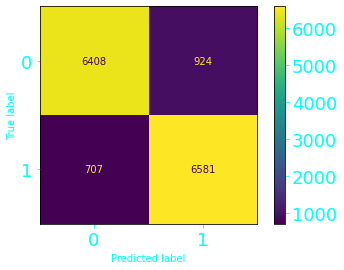

In [81]:
cm = confusion_matrix(y_test_svc,y_pred_svc, labels=model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svc.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [82]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_svc,y_pred_svc, labels=model_svc.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('SMOTE Scaled dataset - Support Vector Classifier')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6408, False Positive = 924, False Negative = 707,True Positive = 6581
Accuracy is 0.89
Precision is 0.88
Sensitivity is 0.9
Specificity is 0.87
F1 Score is 0.89


In [83]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_ss,y_sm,test_size=0.2, random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='distance')
model_knn.fit(X_train_knn,y_train_knn)
y_pred_knn = model_knn.predict(X_test_knn)
print('Classification report of SMOTE scaled dataset - K Nearest Neighbor')
print(classification_report(y_test_knn,y_pred_knn))

Classification report of SMOTE scaled dataset - K Nearest Neighbor
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7332
           1       0.90      0.95      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620



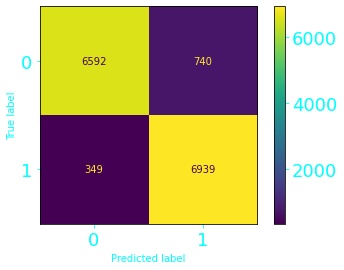

In [84]:
cm = confusion_matrix(y_test_knn,y_pred_knn, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [85]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_knn,y_pred_knn, labels=model_knn.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('SMOTE Scaled dataset - K Nearest Neighbor')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6592, False Positive = 740, False Negative = 349,True Positive = 6939
Accuracy is 0.93
Precision is 0.9
Sensitivity is 0.95
Specificity is 0.9
F1 Score is 0.92


In [105]:
X_train_bg, X_test_bg, y_train_bg, y_test_bg = train_test_split(X_ss,y_sm,test_size=0.2, random_state=42)
model_bg = BaggingClassifier(n_estimators=15,max_samples=0.8,max_features=0.6)
model_bg.fit(X_train_bg,y_train_bg)
y_pred_bg = model_bg.predict(X_test_bg)
print('Classification report of SMOTE scaled dataset - Bagging Classifier')
print(classification_report(y_test_bg,y_pred_bg))


Classification report of SMOTE scaled dataset - Bagging Classifier
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7332
           1       0.95      0.95      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



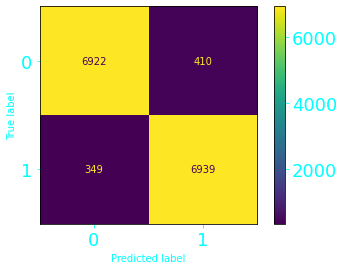

In [87]:
cm = confusion_matrix(y_test_bg,y_pred_bg, labels=model_bg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_bg.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [88]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_bg,y_pred_bg, labels=model_bg.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('SMOTE Scaled dataset - Bagging Classifier')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6922, False Positive = 410, False Negative = 349,True Positive = 6939
Accuracy is 0.95
Precision is 0.94
Sensitivity is 0.95
Specificity is 0.94
F1 Score is 0.94


In [90]:
X_train_boo, X_test_boo, y_train_boo, y_test_boo = train_test_split(X_ss,y_sm,test_size=0.2, random_state=42)
model_boo = GradientBoostingClassifier(loss='deviance',learning_rate=0.15,criterion='friedman_mse',
                                      min_samples_split=9,min_impurity_decrease=0.08,max_features='log2',
                                      max_depth=4,n_estimators=20)

model_boo.fit(X_train_boo,y_train_boo)
y_pred_boo = model_boo.predict(X_test_boo)
print('Classification report of SMOTE scaled dataset - Gradient Boosting Classifier')
print(classification_report(y_test_boo,y_pred_boo))


Classification report of SMOTE scaled dataset - Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7332
           1       0.88      0.94      0.91      7288

    accuracy                           0.90     14620
   macro avg       0.91      0.90      0.90     14620
weighted avg       0.91      0.90      0.90     14620



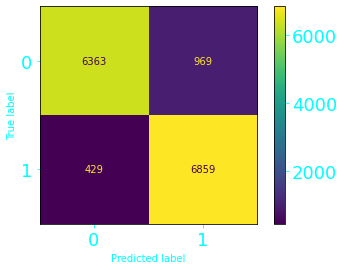

In [91]:
cm = confusion_matrix(y_test_boo,y_pred_boo, labels=model_boo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_boo.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [92]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_boo,y_pred_boo, labels=model_boo.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('SMOTE Scaled dataset - Gradient Boosting Classifier')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6363, False Positive = 969, False Negative = 429,True Positive = 6859
Accuracy is 0.9
Precision is 0.88
Sensitivity is 0.94
Specificity is 0.87
F1 Score is 0.91


In [93]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_ss,y_sm,test_size=0.2, random_state=42)
model_rf = RandomForestClassifier(n_estimators=50,min_impurity_decrease=0.05,max_depth=7,max_features='log2',
                                 criterion='entropy')
model_rf.fit(X_train_rf,y_train_rf)
y_pred_rf = model_rf.predict(X_test_rf)
print('Classification report of SMOTE scaled dataset - Random Forest Classifier')
print(classification_report(y_test_rf,y_pred_rf))


Classification report of SMOTE scaled dataset - Random Forest Classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      7332
           1       0.84      0.92      0.88      7288

    accuracy                           0.87     14620
   macro avg       0.88      0.87      0.87     14620
weighted avg       0.88      0.87      0.87     14620



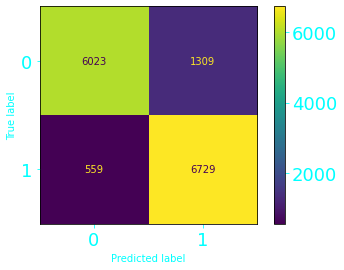

In [94]:
cm = confusion_matrix(y_test_rf,y_pred_rf, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.show()

In [95]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_rf,y_pred_rf, labels=model_rf.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('SMOTE Scaled dataset - Random Forest Classifier')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 6023, False Positive = 1309, False Negative = 559,True Positive = 6729
Accuracy is 0.87
Precision is 0.84
Sensitivity is 0.92
Specificity is 0.82
F1 Score is 0.88


In [123]:
df_res = pd.DataFrame(all_metrics)
df_res.reset_index(drop=True,inplace=True)
df_res.rename(columns={0:'Dataset/Algo',1:'False_Positive',2:'False_Negative',3:'Accuracy',4:'Precision',5:'Recall',6:'Specificity',7:'F1_Score'},inplace=True)
df_res.sort_values(by='F1_Score', ascending=False,inplace=True)
df_res.sort_values(by=['F1_Score','Accuracy'], ascending = False, inplace=True)
df_res.reset_index(drop=True, inplace=True)
df_res

,Dataset/Algo,False_Positive,False_Negative,Accuracy,Precision,Recall,Specificity,F1_Score
0,SMOTE Scaled dataset - Bagging Classifier,410,349,0.95,0.94,0.95,0.94,0.94
1,SMOTE Scaled dataset - K Nearest Neighbor,740,349,0.93,0.90,0.95,0.90,0.92
2,SMOTE-Scaled dataset,715,425,0.92,0.91,0.94,0.90,0.92
3,SMOTE Scaled dataset - Gradient Boosting Class...,969,429,0.90,0.88,0.94,0.87,0.91
4,SMOTE Scaled dataset - Support Vector Classifier,924,707,0.89,0.88,0.90,0.87,0.89
5,SMOTE Scaled dataset - Logistic Regression,876,819,0.88,0.88,0.89,0.88,0.88
6,SMOTE Scaled dataset - Random Forest Classifier,1309,559,0.87,0.84,0.92,0.82,0.88
7,Original dataset after SMOTE,1148,1038,0.85,0.84,0.86,0.84,0.85
8,Over-sampled dataset,1300,1022,0.84,0.82,0.86,0.83,0.84
9,Under-sampled dataset,132,198,0.82,0.84,0.78,0.86,0.81


In [122]:
df_long = df_res.reset_index().melt(id_vars='Dataset/Algo', var_name='Metric', value_name='Value')
px.sunburst(data_frame = df_long, path=['Dataset/Algo','Metric','Value'],)

#### Considering only SVC 

In [134]:
df_SVC = df_res.drop([0,1,3,5,6])
df_SVC.sort_values(by=['F1_Score','Accuracy'], inplace=True,ascending=False)
df_SVC.reset_index(drop=True, inplace=True)
df_SVC

,Dataset/Algo,False_Positive,False_Negative,Accuracy,Precision,Recall,Specificity,F1_Score
0,SMOTE-Scaled dataset,715,425,0.92,0.91,0.94,0.90,0.92
1,SMOTE Scaled dataset - Support Vector Classifier,924,707,0.89,0.88,0.90,0.87,0.89
2,Original dataset after SMOTE,1148,1038,0.85,0.84,0.86,0.84,0.85
3,Over-sampled dataset,1300,1022,0.84,0.82,0.86,0.83,0.84
4,Under-sampled dataset,132,198,0.82,0.84,0.78,0.86,0.81
5,Original dataset with 70:30 split,178,1095,0.90,0.64,0.22,0.98,0.33
6,Original dataset with 75:25 split,156,906,0.90,0.61,0.21,0.98,0.31
7,Original dataset with 80:20 split,127,742,0.89,0.60,0.21,0.98,0.31


#### SVC with SMOTE scaled dataset with default hyper parameters performed best

## -----------------------------------------------------------------------------

#### An Effort by : MAVERICK_GR
DEVELOPER CONTACT DETAILS

email id: gururaj008@gmail.com

Personal webpage hosting other Datascience projects:

https://gururaj008-personal-webpage.streamlit.app/

http://gururaj008.pythonanywhere.com/

LinkedIn profile : https://www.linkedin.com/in/gururaj-hc-machine-learning-enthusiast/

Github link: https://github.com/Gururaj008

